# Poission GLM (Attempt 1)

Below are the different GLM methods possible. Initially we take Xell's code and clean it a little.

First all package imports have been collated for ease.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split

Next we simply import our data and get it into the format required. We are firslty looking to tackle the 31-day data to start off with.

In [2]:
#Read the data into the file.
fullData = pd.read_csv("31DayDataUpdate.csv")

#Create a dataframe from the relevant columns.
df = fullData[['Quarter', 'HB', 'CancerType','NumberOfEligibleReferrals31DayStandard','NumberOfEligibleReferralsTreatedWithin31Days']]

#Remove the 'all cancer types' rows from the dataframe.
df = df[df['CancerType'] != 'All Cancer Types']
df = df[df['NumberOfEligibleReferrals31DayStandard'].notna()]

The following may be of use when looking at the correlation between the two sets of numerical values which we have here. We can also identify all the data types within our frame.

In [3]:
#Correlation of the Eligible Referrals with the Eligible Referalls Treated.
rho = df.corr()
#print(rho)

#View of the whole data frame.
types = df.dtypes
#print(types)

Next we take an overview of the different cancers within the data we have in our set. We firstly achieve four different graphs which are explained below the output, before also looking at the boxplot in the situation.

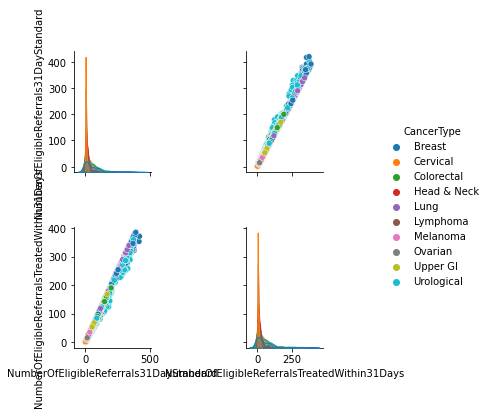

In [4]:
sns.pairplot(df, hue='CancerType', height=2.5, aspect=1)

<AxesSubplot:xlabel='CancerType', ylabel='NumberOfEligibleReferrals31DayStandard'>

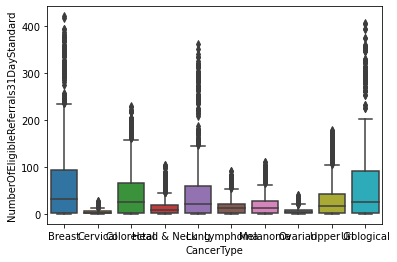

In [5]:
sns.boxplot(y='NumberOfEligibleReferrals31DayStandard', x='CancerType',data=df)

Next we look to form the variables in the correct way. This is the first part of building our GLM.

## 0. Correct form of data for a GLM

In [6]:
# choose explanatory variables - note we can also include 'Quarter', 'CancerType' and 'Sex' here.
X = df[['HB', 'CancerType']]

# turn our catergories into dummies.
X = pd.get_dummies(data=X, drop_first=True)
#X.head()

# choose which column is the targeted output data.
Y = df['NumberOfEligibleReferrals31DayStandard']
#Y.head()

## 1. SKLearn

Below we create our GLM model using the SKLearn method.

In [7]:
#Build the model using SKLearn.
prSKLearn = PoissonRegressor(alpha=0, fit_intercept=True)

#Fit the model using the build above.
prSKLearn.fit(X, Y)
parameters = prSKLearn.get_params()
score = prSKLearn.score(X, Y)

#Should we want to see the values of each of the intercepts we can do so by uncommenting the below.
#print(prSKLearn.intercept_)

print(score)

#I need to check what the below actually does...
coeff_parameter = pd.DataFrame(prSKLearn.coef_, X.columns,columns=['Coefficient'])

0.6761299908612455


Next we use instead use our data in a split manner in order to try and see whether the GLM achieves a suitable outcome (from https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c).


In [8]:
#Split our data into test and train.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

#Use our training data to let the SKLearn model learn
prSKLearn.fit(X_train, y_train)

#Get predictions for the test data using the SKLearn model.
predictions = prSKLearn.predict(X_test)

In [9]:
#Quantify the useful nature of the model using the R2 value.
print(prSKLearn.score(X_train, y_train))

0.6774344336599762


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumberOfEligibleReferrals31DayStandard'>

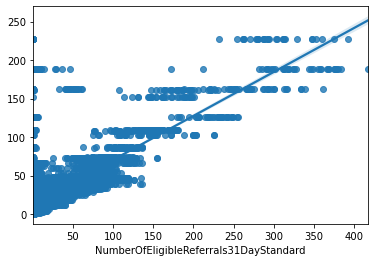

In [10]:
#Create a regressional plot to show 
sns.regplot(y_test, predictions)

## 2. StatsModels
Next we use the StatsModels package to create the GLM.

In [11]:
#Add the X to the constants.
XSM = sm.add_constant(X)

#Create the model.
ls=sm.OLS(Y,XSM).fit()

#Print the summary of the model.
print(ls.summary())

                                      OLS Regression Results                                      
Dep. Variable:     NumberOfEligibleReferrals31DayStandard   R-squared:                       0.477
Model:                                                OLS   Adj. R-squared:                  0.476
Method:                                     Least Squares   F-statistic:                     568.8
Date:                                    Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                                            18:45:15   Log-Likelihood:                -69753.
No. Observations:                                   13753   AIC:                         1.396e+05
Df Residuals:                                       13730   BIC:                         1.397e+05
Df Model:                                              22                                         
Covariance Type:                                nonrobust                                         
          

----------------------------------------------------------------------

# Poisson GLM (Attempt 2)
Firstly below we read our data in different ways, and furthermore edit the data to a certain extent to make it easier for handling. We also then provide some summary statistics and graphs.

In [13]:
#Import the 31 day standard data.
Data31Read = pd.read_csv("31DayDataUpdate.csv")
Data31 = Data31Read[['Quarter', 'HB', 'CancerType','NumberOfEligibleReferrals31DayStandard','NumberOfEligibleReferralsTreatedWithin31Days']]

#Import the 62 day standard data.
Data62Read = pd.read_csv("62DayDataUpdate.csv")
Data62 = Data62Read[['Quarter', 'HB', 'CancerType','NumberOfEligibleReferrals62DayStandard','NumberOfEligibleReferralsTreatedWithin62Days']]

#Import the weekly cancer data.
WeekData = pd.read_csv("cancerdata.csv")

In [14]:
#Make edits to the data 

##31Day Edits start here.
df31 = Data31

#Remove NaNs and 'all cancer types'
df31 = df31[df31['NumberOfEligibleReferrals31DayStandard'].notna()]
df31 = df31[df31['NumberOfEligibleReferralsTreatedWithin31Days'].notna()]
df31 = df31[df31['CancerType'] != 'All Cancer Types']

# add a numerical variable 1-1 to quarters and an index variable before/after pandemic
quarters = df31['Quarter']
date = np.zeros(len(quarters))
quars = df31['Quarter'].unique()
dates = np.arange(len(quars))
pandemic = np.zeros(len(quarters))
x = np.where(quars == '2020Q2') # change to decide in which quarter the pandemic begins
pandemic = np.zeros(len(quarters))
x = np.where(quars == '2020Q2')
j=0
for i in np.arange(len(quarters)):
    y = np.where(quars == quarters[i])
    date[i] = dates[y]
    if dates[y] > x:
        pandemic[i] = dates[y]-x

df31['Date'] = date.tolist()
df31['Pandemic'] = pandemic.tolist()

##Do the same with 62 days data
df62 = Data62

#Remove NaNs and 'all cancer types'
df62 = df62[df62['NumberOfEligibleReferrals62DayStandard'].notna()]
df62 = df62[df62['NumberOfEligibleReferralsTreatedWithin62Days'].notna()]
df62 = df62[df62['CancerType'] != 'All Cancer Types']

# add a numerical variable 1-1 to quarters and an index variable before/after pandemic
quarters = df62['Quarter']
date = np.zeros(len(quarters))
quars = df62['Quarter'].unique()
dates = np.arange(len(quars))
pandemic = np.zeros(len(quarters))
x = np.where(quars == '2020Q2') # change to decide in which quarter the pandemic begins
pandemic = np.zeros(len(quarters))
x = np.where(quars == '2020Q2')
j=0
for i in np.arange(len(quarters)):
    y = np.where(quars == quarters[i])
    date[i] = dates[y]
    if dates[y] > x:
        pandemic[i] = dates[y]-x

df62['Date'] = date.tolist()
df62['Pandemic'] = pandemic.tolist()



#Edit weekly data
dfW = WeekData

#Remove NaNs and cumulative data.
dfW = dfW[dfW['CancerType'] != 'All Cancers']
dfW = dfW[dfW['Age Group'] != 'All Ages']
dfW = dfW[dfW['Sex'] != 'All']
dfW = dfW[dfW['Count'].notna()]

months = np.asarray(dfW['Month'])
date = np.zeros(len(months))
quars = dfW['Month'].unique()
dates = np.arange(len(quars))
pandemic = np.zeros(len(months))
x = np.where(quars == 202003)

for i in np.arange(len(months)):
    
    y = np.where(quars == months[i])
    date[i] = dates[y]
    if dates[y] > x:
        pandemic[i] = dates[y]-x

dfW['Date'] = date.tolist()
dfW['Pandemic'] = pandemic.tolist()

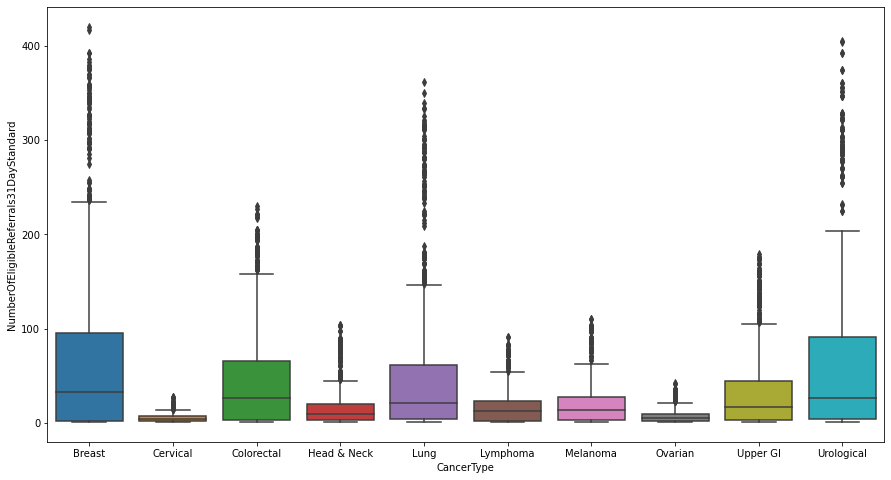

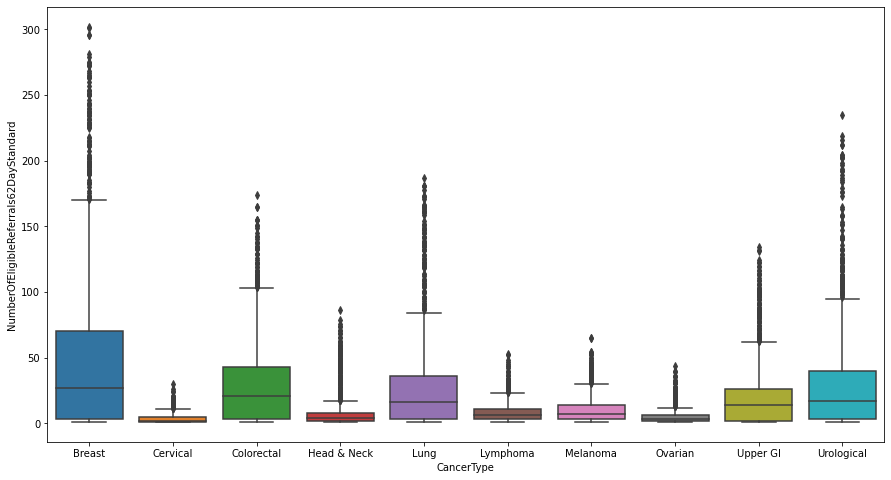

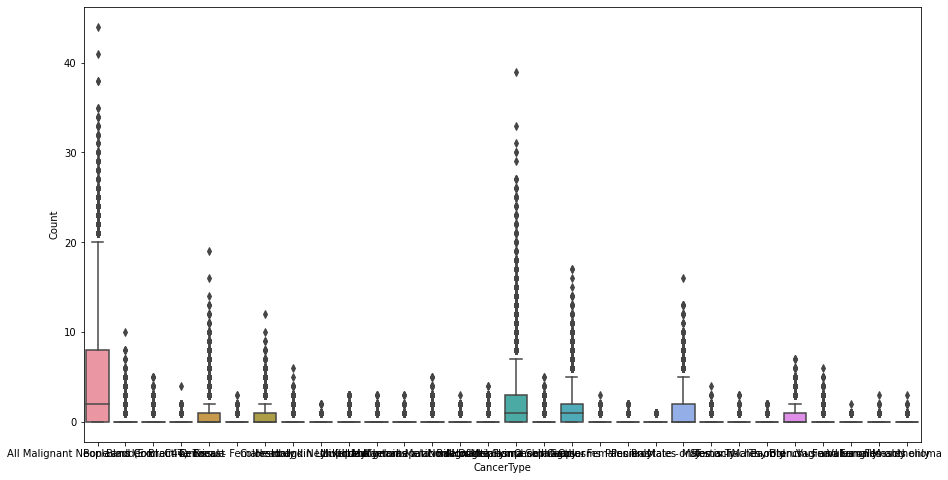

In [15]:
# take a look at what we have

Cor31 = df31.corr()
Cor62 = df62.corr()
CorW = dfW.corr()

# plot eligibles per cancer type
plt.figure(figsize=(15,8))
ax =sns.boxplot(y='NumberOfEligibleReferrals31DayStandard', x='CancerType', data=df31)
plt.show()

plt.figure(figsize=(15,8))
ax =sns.boxplot(y='NumberOfEligibleReferrals62DayStandard', x='CancerType', data=df62)
plt.show()

plt.figure(figsize=(15,8))
ax =sns.boxplot(y='Count', x='CancerType', data=dfW)
plt.show()

## 3. Hybrid Inputs
Next we take Xell's code which is in more of a functional mode.

In [23]:
#Define a function that fits poisson regression.
def poissonGLM(X, Y, Train):
    '''
    inputs:
        X: explanatory variables (dataframe)
        Y: output variable (dataframe)
        train: do training or not (boolean)
    outputs:
        parameters: possion regressor parameters
        intercept: value of independetn term (y intercept), 
        coefficients: coefficients of explanatory vairables (all linera)
        y_test: testing data
        predictions: predicted data
        stats : summary of statistics of the predictive power of the model
    '''
    
    #Turn categorical into dummies.
    X = pd.get_dummies(data=X, drop_first=True)
    
    #Build model.
    prFunction = PoissonRegressor(alpha=0, fit_intercept=True, max_iter = 10000)
    
    #Fit model.
    prFunction.fit(X, Y)
    
    #Recover model information.
    parameters = prFunction.get_params()
    intercept = prFunction.intercept_
    coefficients = pd.DataFrame(prFunction.coef_,X.columns, columns=['Coefficient'])
    
    #Initialise training parameters.
    y_train = 0
    predictions = 0 
    stats = 0
    
    if Train==1:
        
        #Split data into train and test (test_size specifies %).
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
        
        #Fit training data.
        prFunction.fit(X_train, y_train)
        
        #Use model to predict test data outputs.
        predictions = prFunction.predict(X_test)
        
    #Also now run the Statsmodels version of prediction.
    XSM = sm.add_constant(X)
    ls = sm.OLS(Y, X).fit()
    stats = ls.summary()
    
    return parameters, intercept, coefficients, y_test, predictions, stats

In [24]:
#Create the options for explanatory and output data.

#FOR 31 DAYS DATA
#Choose explanatory variables
X31 = df31[['Date','CancerType','HB']] #no pandemic
X31_p = df31[['Pandemic','CancerType','HB']] #pandemic, no date
X31_dp = df31[['Date','Pandemic','CancerType','HB']] #both
#Choose output data
Y31 = df31['NumberOfEligibleReferrals31DayStandard']
Y31t = df31['NumberOfEligibleReferralsTreatedWithin31Days']


#FOR 62 DAYS DATA
#Choose explanatory variables
X62 = df62[['Date','HB','CancerType']] #no pandemic
X62_p = df62[['Pandemic','CancerType','HB']] #pandemic, no date
X62_dp = df62[['Date','Pandemic','CancerType','HB']] #both
#Choose output data
Y62 = df62['NumberOfEligibleReferrals62DayStandard']
Y62t = df62['NumberOfEligibleReferralsTreatedWithin62Days']


## FOR WEEKLY DIAGNOSIS DATA
XW = dfW[['Date','HB', 'Sex','Age Group']]
XW_p = dfW[['Pandemic','HB', 'Sex','Age Group']]
XW_dp = dfW[['Pandemic','Date','HB', 'Sex','Age Group']]
#Choose output data
YW = dfW['Count']

In [25]:
#Choose explanatory and output variables from above sets.
X=X31_dp
Y=Y31

#Run Poisson regression for chosen data
parameters, intercept, coefficients, y_test, predictions, stats = poissonGLM(X, Y, 1)

3.7608267225649663
          Coefficient
Pandemic     0.015893


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                                           OLS Regression Results                                          
Dep. Variable:     NumberOfEligibleReferrals31DayStandard   R-squared (uncentered):                   0.593
Model:                                                OLS   Adj. R-squared (uncentered):              0.593
Method:                                     Least Squares   F-statistic:                              834.5
Date:                                    Thu, 17 Feb 2022   Prob (F-statistic):                        0.00
Time:                                            19:44:21   Log-Likelihood:                         -70264.
No. Observations:                                   13753   AIC:                                  1.406e+05
Df Residuals:                                       13729   BIC:                                  1.408e+05
Df Model:                                              24                                                  
Covariance Type:            

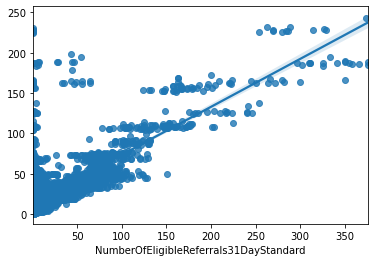

In [35]:
# take a look at results of Poisson Regressor
print(intercept)
print(coefficients[1:2])

# check predictive power
sns.regplot(y_test,predictions)

# take a look at results of Statsmodels
print(stats)

-----------
# Analysis of vartiation of $\epsilon$


In [71]:
##31Day Edits start here.
df31e = Data31

#Remove NaNs and 'all cancer types' and add a numerical variable 1-1 to quarters
df31e = df31e[df31e['NumberOfEligibleReferrals31DayStandard'].notna()]
df31e = df31e[df31e['NumberOfEligibleReferralsTreatedWithin31Days'].notna()]
df31e = df31e[df31e['CancerType'] != 'All Cancer Types']
quarters = df31e['Quarter']
date = np.zeros(len(quarters))
quars = df31e['Quarter'].unique()
dates = np.arange(len(quars))

CovQuarters = ['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4']

CoefHold31 = []

for i in CovQuarters:
    #index variable before/after pandemic
    pandemic = np.zeros(len(quarters))
    x = np.where(quars == i) # change to decide in which quarter the pandemic begins
    pandemic = np.zeros(len(quarters))
    x = np.where(quars == i)
    
    j=0
    for j in np.arange(len(quarters)):
        y = np.where(quars == quarters[j])
        date[j] = dates[y]
        if dates[y] > x:
            pandemic[j] = dates[y]-x

    df31e['Date'] = date.tolist()
    df31e['Pandemic'] = pandemic.tolist()
    X31_dpe = df31e[['Date','Pandemic','CancerType','HB']]
    Y31e = df31e['NumberOfEligibleReferrals31DayStandard']
    
    X=X31_dpe
    Y=Y31e
    parameters, intercept, coefficients, y_test, predictions, stats = poissonGLM(X, Y, 1)
    newCoef = coefficients[1:2].to_numpy()
    CoefHold31.append(newCoef[0][0])

In [72]:
##31Day Edits start here.
df62e = Data62

#Remove NaNs and 'all cancer types' and add a numerical variable 1-1 to quarters
df62e = df62e[df62e['NumberOfEligibleReferrals62DayStandard'].notna()]
df62e = df62e[df62e['NumberOfEligibleReferralsTreatedWithin62Days'].notna()]
df62e = df62e[df62e['CancerType'] != 'All Cancer Types']
quarters = df62e['Quarter']
date = np.zeros(len(quarters))
quars = df62e['Quarter'].unique()
dates = np.arange(len(quars))

CovQuarters = ['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4']

CoefHold62 = []

for i in CovQuarters:
    #index variable before/after pandemic
    pandemic = np.zeros(len(quarters))
    x = np.where(quars == i) # change to decide in which quarter the pandemic begins
    pandemic = np.zeros(len(quarters))
    x = np.where(quars == i)
    
    j=0
    for j in np.arange(len(quarters)):
        y = np.where(quars == quarters[j])
        date[j] = dates[y]
        if dates[y] > x:
            pandemic[j] = dates[y]-x

    df62e['Date'] = date.tolist()
    df62e['Pandemic'] = pandemic.tolist()
    X62_dpe = df62e[['Date','Pandemic','CancerType','HB']]
    Y62e = df62e['NumberOfEligibleReferrals62DayStandard']
    
    X=X62_dpe
    Y=Y62e
    parameters, intercept, coefficients, y_test, predictions, stats = poissonGLM(X, Y, 1)
    newCoef = coefficients[1:2].to_numpy()
    CoefHold62.append(newCoef[0][0])

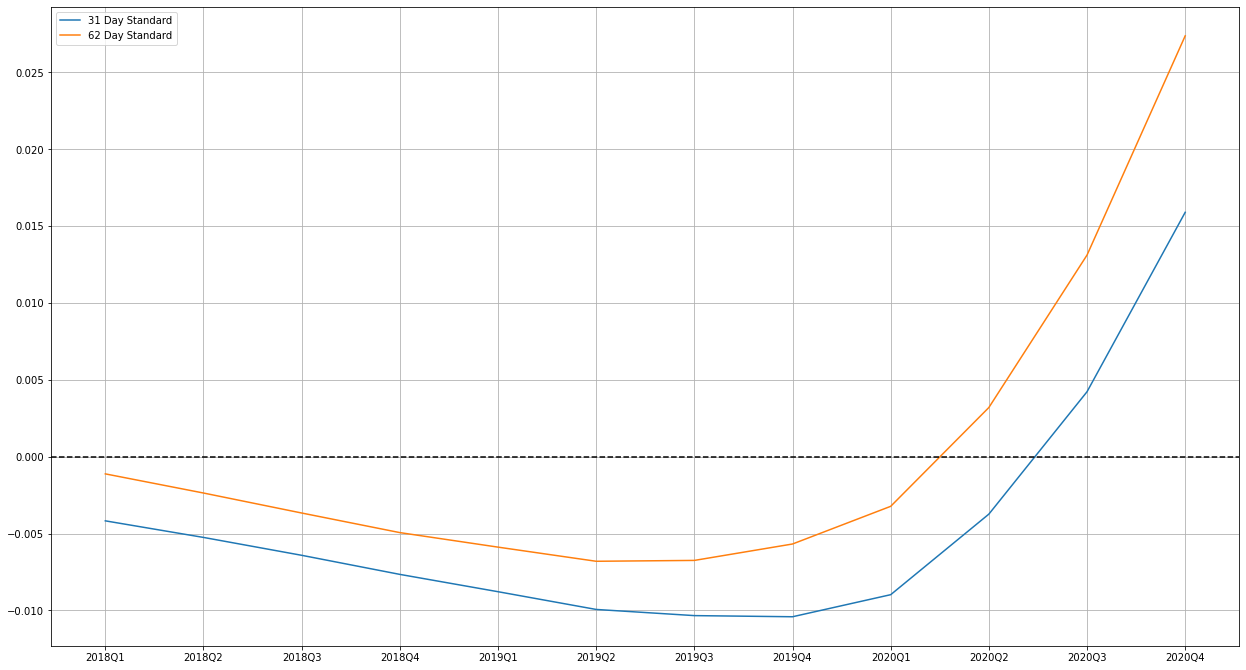

In [74]:
fig, d1 = plt.subplots(1, 1, sharey=True)
d1.plot(['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4'], CoefHold31)    
d1.plot(['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4'], CoefHold62)
d1.grid()
plt.legend(["31 Day Standard", "62 Day Standard"])
plt.axhline(y=0, color='k', linestyle='--')
fig.set_size_inches(18.5, 10.5, forward=True)
fig.tight_layout(pad=5.0) 
plt.show()